In [106]:
from tensorflow import keras

mnist = keras.datasets.mnist.load_data()
type(mnist)


tuple

In [107]:
len(mnist)

2

In [108]:
print(mnist.count)

<built-in method count of tuple object at 0x192d3cec0>


In [109]:
print(mnist.index)

<built-in method index of tuple object at 0x192d3cec0>


In [110]:
help(mnist)

Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Built-in subclasses:
 |      asyncgen_hooks
 |      UnraisableHookArgs
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |

In [111]:
type(mnist)

tuple

In [112]:
(X_train, y_train), (X_test, y_test) = mnist

In [113]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [114]:
X_train.max(), X_test.min()

(255, 0)

In [115]:
X_train[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [116]:
max = X_train[[X_train.max()]]
max.shape

(1, 28, 28)

### d) plot min and max image

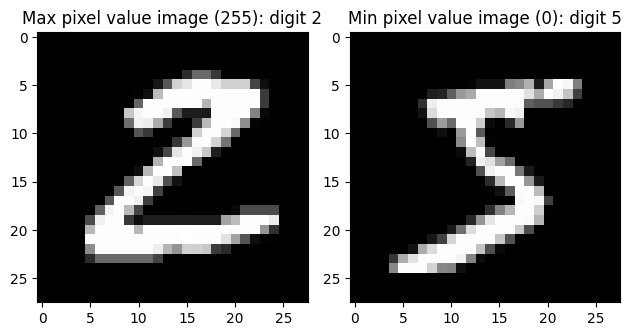

In [117]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

max_idx, min_idx = np.argmax(X_train), np.argmin(X_train)

fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the maximum value image
ax1.imshow(X_train[max_idx], cmap='gray')
ax1.set_title(f"Max pixel value image ({X_train[max_idx].max()}): digit {y_train[max_idx]}")

# Plot the minimum value image
ax2.imshow(X_train[min_idx], cmap='gray')
ax2.set_title(f"Min pixel value image ({X_train[min_idx].min()}): digit {y_train[min_idx]}")

plt.tight_layout()
# Show the plot
plt.show()

### e) plot 20 sample images

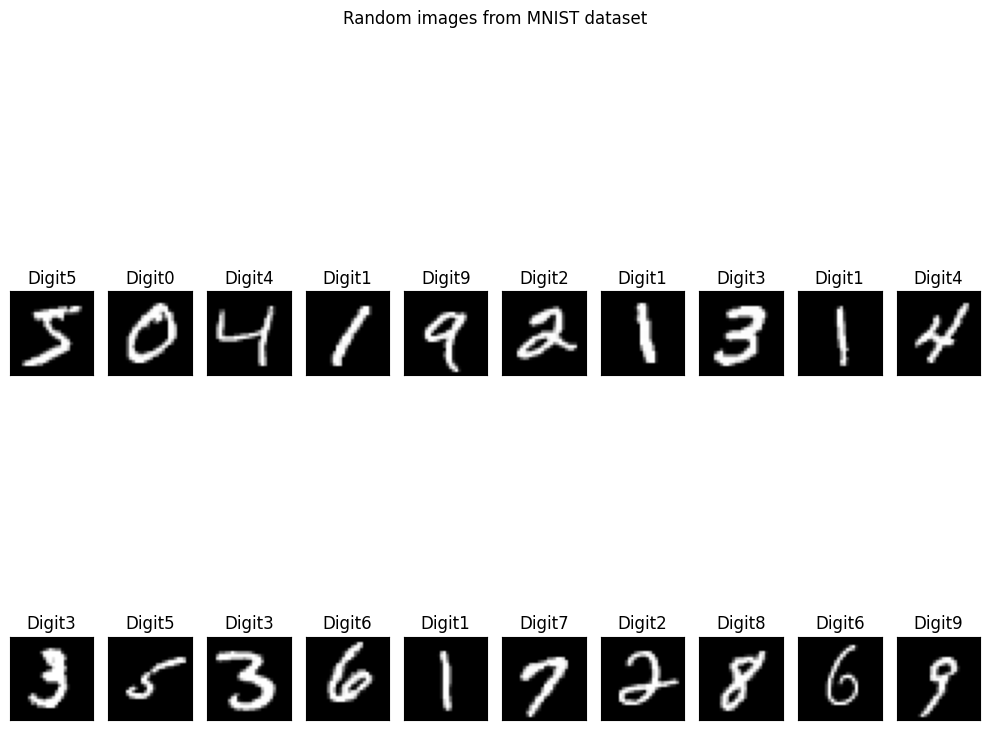

In [118]:
# Generate 20 random indices
indices = np.random.choice(X_train.shape[0], 20, replace=False)

#creates a figure with 20 subplots arranged in 5X4
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(10, 10))
axes = ax.flatten()


for index, image in enumerate(indices):
    axes[index].imshow(X_train[index], cmap='gray')
    axes[index].set_title(f"Digit{y_train[index]}")
    
    axes[index].set_xticks([])
    axes[index].set_yticks([])
    
fig.suptitle("Random images from MNIST dataset")

plt.tight_layout()

### f) 

In [119]:
X_train.shape

(60000, 28, 28)

In [120]:
example_image = X_train[0]

# Reshape the image to a 2D shape
reshaped_image = example_image.reshape((example_image.shape[0], -1))
reshaped_image.shape


(28, 28)

In [121]:
# Get the number of samples and the original image dimensions
num_samples, img_rows, img_cols = X_train.shape

# Reshape the training data to a 2D array
x_train_2d = X_train.reshape(num_samples, img_rows * img_cols)

# Print the original and reshaped shapes
print("Original shape:", X_train.shape)
print("Reshaped shape:", x_train_2d.shape)

Original shape: (60000, 28, 28)
Reshaped shape: (60000, 784)


In [122]:
y_train.shape

(60000,)

## 1. Train|test|validation split (*)

As you already have training data and testing data, do a split on the training data to get validation data. The validation data will be used for tuning $k$ number of neighbors for KNN. I used 0.16 for validation as it is close to 1/6 to get around 10000 validation samples.

In [123]:
from sklearn.model_selection import train_test_split

X_train_val, X_val, y_train_val, y_val = train_test_split(x_train_2d, y_train, test_size=0.167, random_state=42)
print(X_train.shape,y_train.shape, X_val.shape, y_val.shape)


(60000, 28, 28) (60000,) (10020, 784) (10020,)


## 2. Hyperparameter tuning (*)

Train the models for a set of $k$-values using the training data and make predictions on validation data. Plot the validation accuracy against different $k$-values. Based on your plot, which $k$ do you choose? 


In [124]:
# scale data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train_val)
scaled_X_val = scaler.transform(X_val)

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

def k_selector(x, y, val, yval):
    error_list = []
    
    for k in range(1, 10):
        model_KNN = KNeighborsClassifier(n_neighbors=k)
        model_KNN.fit(x, y)
        y_val_pred = model_KNN.predict(val)
        error_list.append(accuracy_score(yval, y_val_pred))
    #print(error_list)
    fig, ax = plt.figure(), plt.axes()
    ax.plot(range(1, len(error_list)+1), error_list, ".-")
    ax.set(title="Elbow plot", xlabel = "k neightbours", ylabel= "Error")

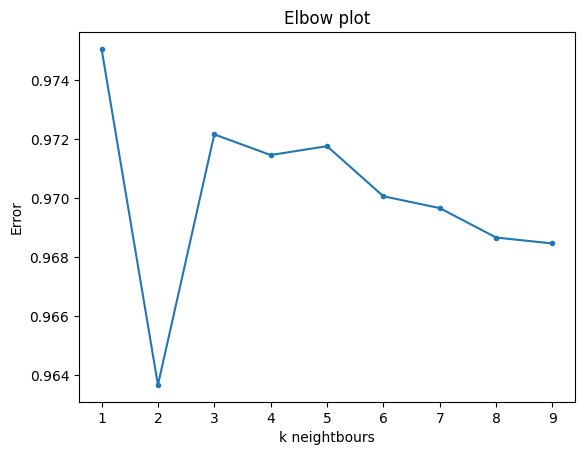

In [126]:
k_selector(x=scaled_X_train,y= y_train_val,val= scaled_X_val,yval= y_val)

Best k value would be 2 from the above elbow plot

## 3. Train and predict (*)

Now train the KNN model using the $k$ value you have chosen. Don't waste any training samples, so use all the original 60000 of the X_train for training the KNN model. Predict on the test data. 

&nbsp; a) Do a classification report and based on the report, can you figure out which number had highest proportions of false negatives. False negative in this case means that the true label is $i$ but the model predicted not $i$.  

&nbsp; b) Plot a confusion matrix, does this confirm your answer in a?

&nbsp; c) Compute the number of misclassifications for each number. Which number had most misclassifications, do you have any suggestions on why this would be the case?

In [127]:
x_train_2d.shape

(60000, 784)

a).

In [128]:
# Get the number of samples and the original image dimensions
num_samples, img_rows, img_cols = X_test.shape

# Reshape the training data to a 2D array
x_test_2d = X_test.reshape(num_samples, img_rows * img_cols)


In [136]:
y_train.shape, x_train_2d.shape, x_test_2d.shape, y_test.shape

((60000,), (60000, 784), (10000, 784), (10000,))

In [139]:
model_new_knn = KNeighborsClassifier(n_neighbors=2)
scaled_X_train = scaler.fit_transform(x_train_2d)
scaled_X_test = scaler.transform(x_test_2d)

model_new_knn.fit(scaled_X_train, y_train)

y_test_preds = model_new_knn.predict(scaled_X_test)

In [140]:
y_test_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [141]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

b.) confusion matrix

In [146]:
y_test.shape, y_test_preds.shape

((10000,), (10000,))

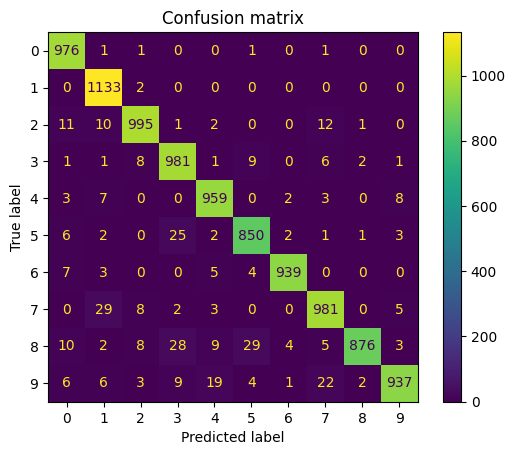

In [144]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

confusion_matrix = confusion_matrix(y_test, y_test_preds)
ConfusionMatrixDisplay(confusion_matrix).plot()
plt.title('Confusion matrix');

c.) computiing misclassifications

In [147]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.97      0.96      0.97      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.98      0.97       982
           5       0.95      0.95      0.95       892
           6       0.99      0.98      0.99       958
           7       0.95      0.95      0.95      1028
           8       0.99      0.90      0.94       974
           9       0.98      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [149]:
confusion_matrix.shape

(10, 10)

In [151]:
misclassifications = sum(confusion_matrix[i,j] for i in range(10) for j in range(10) if i != j)
print(f"Number of misclassification according to model is {misclassifications}")

Number of misclassification according to model is 373
